<a href="https://colab.research.google.com/github/harshii11/FMML/blob/main/Mod3_project_fmml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad**
# Project : Data Visualization, Choosing K-value and Appreciating Feature Scaling and Standardization
## Module Coordinator: Jashn Arora

---

## Binary Classification Task: Diabetes Dataset

We’ll be using ML techniques learnt uptil now to predict whether a Pima Indian Woman has diabetes or not, based on information about the patient such as blood pressure, body mass index (BMI), age, etc.



# Introduction

Scientists carried out a study to investigate the significance of health-related predictors of diabetes in **Pima Indian Women**. The study population was females (21 years and above) of Pima Indian heritage.

The purpose of the study was to find out the factors that are associated with the presence of diabetes in Pima Indians.

To find out the reason behind this, we have to first analyze the relationship between different features, such as the number of times a woman was pregnant, their BMI, prevalence of diabetes, etc.

## Exploratory Data Analysis (EDA) and Statistical Analysis

## Import Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

## Importing the dataset

In [5]:
# Upload the preprocessed diabetes data CSV file that has been shared with you.
# Run this cell, click on the 'Choose files' button and upload the file.
from google.colab import files
uploaded = files.upload()

Saving preprocessed_diabetes_data (1).csv to preprocessed_diabetes_data (1) (1).csv


import io
import pandas as pd

# Assuming 'uploaded' contains the file data from the previous cell
diabetes_data = pd.read_csv(io.BytesIO(uploaded['preprocessed_diabetes_data.csv']))

## Identification of variables and data types

In [26]:
diabetes_data.shape

NameError: name 'diabetes_data' is not defined

Dataset comprises of 768 observations and 9 fields.

The following features have been provided to help us predict whether a person is diabetic or not:

* **Pregnancies:** Number of times pregnant
* **Glucose:** Plasma glucose concentration over 2 hours in an oral glucose tolerance test. Less than 140 mg/dL is considered normal level of glucose.
* **BloodPressure:** Diastolic blood pressure (mm Hg). 120/80 is normal BP level for females above 18 years old.
* **SkinThickness:** Triceps skin fold thickness (mm)
* **Insulin:** 2-Hour serum insulin (mu U/ml). 16-166 mIU/L is considered the normal level of insulin.
* **BMI:** Body mass index (weight in kg/((height in m$)^2$))
* **DiabetesPedigreeFunction:** Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)
* **Age:** Age (in years)
* **Outcome:** Class variable (0 if non-diabetic, 1 if diabetic)


In [ ]:
# Get the details of each column
diabetes_data.describe().T

Let us see distribution and also boxplot for outliers of feature "Pregnancies".

NameError: name 'diabetes_data' is not defined

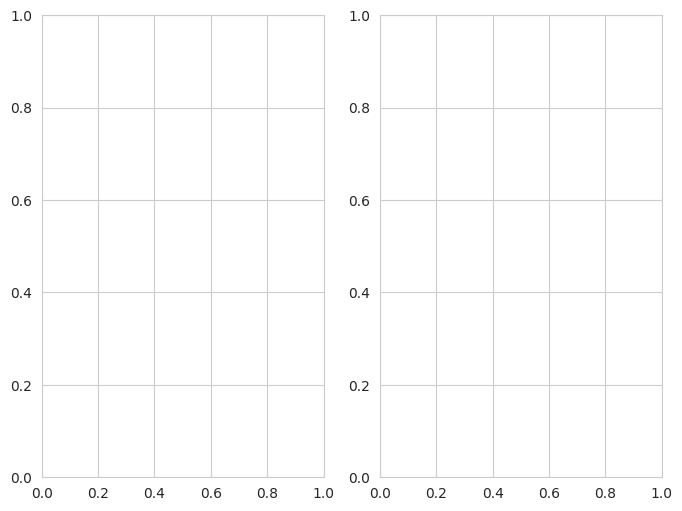

In [13]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize = (8,6))

plot00=sns.distplot(diabetes_data['Pregnancies'],ax=axes[0],color='b')
axes[0].set_title('Distribution of Pregnancy',fontdict={'fontsize':8})
axes[0].set_xlabel('No of Pregnancies')
axes[0].set_ylabel('Frequency')
plt.tight_layout()


plot01=sns.boxplot(data=diabetes_data['Pregnancies'], ax=axes[1],orient = 'v', color='r')
plt.tight_layout()

In [11]:
## TASK-1 :
## Find out the "Correlation" between the different attributes present in the data.
## Also plot a heatmap (refer Seaborn documentation) for the correlation values obtained.

In [ ]:
To perform this task, you can follow these steps in Python using pandas for data manipulation and seaborn for visualization:

Steps:

1. Load the Data: First, load your data using pandas.


2. Compute the Correlation Matrix: Use the .corr() function from pandas to compute the correlation between the numerical columns in your dataset.


3. Plot a Heatmap: Use seaborn’s heatmap() to visualize the correlation matrix.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the data (assuming the file is a CSV)
data = pd.read_csv('your_dataset.csv')

# Step 2: Compute the correlation matrix
correlation_matrix = data.corr()

# Step 3: Plot the heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Step 4: Show the plot
plt.title('Heatmap of Correlation between Attributes')
plt.show()

<p style="font-weight: bold;color:#FF4500"><b>Observations</b></p>  

* From the correlation map you just obtained above, it seems that Insulin is highly correlated with Glucose, BMI and Age. It means that as the values of glucose, BMI and Age increase, the insulin is also increasing. It seems logical also that overweight and elderly people might have a higher level of insulin in their bodies.  

* In the same way SkinThickness is highly correlated with BMI.

## Checking  if the data is balanced or imbalanced

We can produce a seaborn count plot to check if the output is dominated by one of the classes or not.

import pandas as pd #import the library for data manipulation
import seaborn as sns
import matplotlib.pyplot as plt

diabetes_data = pd.read_csv('your_data.csv') #replace your_data.csv with the actual path to the data file
plt.figure(figsize=(12,6))
sns.countplot(x='Outcome',data=diabetes_data, palette='bright')
plt.title("Output class distribution")

print(diabetes_data['Outcome'].value_counts())

import pandas as pd #import the library for data manipulation
import seaborn as sns
import matplotlib.pyplot as plt

diabetes_data = pd.read_csv('your_data.csv') #replace your_data.csv with the actual path to the data file
plt.figure(figsize=(12,6))
sns.countplot(x='Outcome',data=diabetes_data, palette='bright')
plt.title("Output class distribution")

print(diabetes_data['Outcome'].value_counts())

<p style="font-weight: bold;color:#FF4500"><b>Observations</b></p>  

A total of 768 women were registered in the database. 268 women had diabetes, while 500 women did not have diabetes.

The above graph shows that the dataset is biased towards non-diabetic people. The number of non-diabetic people is almost twice the number of diabetic patients.

## Scatter matrix of data

A pair-plot builds on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables.

In [12]:
## TASK-2: Display a pairplot using Seab orn for the diabetes dataset, with the 'outcome' as the hue.

In [ ]:
To display a pairplot using Seaborn for the diabetes dataset with the 'Outcome' as the hue, follow these steps:

Steps:

1. Load the Diabetes Dataset: First, load the diabetes dataset using pandas.


2. Display the Pairplot: Use Seaborn's pairplot() function to create pairwise relationships between all numerical columns and set 'Outcome' as the hue to distinguish between the classes.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the diabetes dataset (assuming the file is a CSV)
# Ensure that the dataset contains the 'Outcome' column for the target variable
data = pd.read_csv('diabetes.csv')

# Step 2: Create a pairplot with 'Outcome' as the hue
sns.pairplot(data, hue='Outcome', diag_kind='kde', palette='Set1')

# Step 3: Show the plot
plt.title('Pairplot of Diabetes Dataset')
plt.show()

## BMI vs Outcome

<p style="font-weight: bold;color:#FF4500"><b>Observations</b></p>

It is surprising that the median BMI does not significanty change as the number of pregnancies increases. Those who tested positive for diabetes had higher BMIs than those who did not. However,there is not a very large difference between the medians.

BMI might be higher for women who have had more numbers of pregnancies as well as for those who test positive for diabetes and that the relationship between the pedigree function and the test results will show that those who had a higher pedigree function tested positive and those who had a lower pedigree function tested negative.

## Pedigree function vs Diabetes

In [14]:
## TASK-3: Display a boxplot between the Pedigree function and Diabetes.

In [ ]:
To display a boxplot between the Pedigree Function (which I assume refers to the DiabetesPedigreeFunction column in your dataset) and the Outcome (diabetes status), you can use the following steps:

Steps:

1. Load the Diabetes Dataset: First, load the dataset using pandas.


2. Plot a Boxplot: Use Seaborn's boxplot() function to plot the relationship between the Pedigree function and the diabetes Outcome.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the diabetes dataset (assuming the file is a CSV)
data = pd.read_csv('diabetes.csv')

# Step 2: Create a boxplot between the Pedigree function and Diabetes outcome
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='DiabetesPedigreeFunction', data=data, palette='Set2')

# Step 3: Add title and labels
plt.title('Boxplot of Diabetes Pedigree Function vs. Diabetes Outcome')
plt.xlabel('Diabetes Outcome')
plt.ylabel('Diabetes Pedigree Function')

# Step 4: Show the plot
plt.show()

<p style="font-weight: bold;color:#FF4500"><b>Observations</b></p>
This graph more clearly shows the relationship between the pedigree function and the test results that the women got for diabetes. Since those who tested positive have a higher median and more high outliers, it is clear that the pedigree function does in fact, accurately help estimate the test results for diabetes. It shows that diabetes does follow genetics so those whose ancestors suffered from it have a higher risk of getting the disease themselves as well. Both test results show many outliers yet the outliers for those who tested negative seem to have lower pedigree functions than those who tested positive. This indicates that the genetic component is likely to contribute more to the emergence of diabetes in the Pima Indians and their offspring.

## Pregnancy vs Diabetes

In [15]:
## TASK-4: Display a boxplot between the number of Pregnancies and Diabetes.

In [ ]:
To display a boxplot between the number of pregnancies and diabetes outcome, follow these steps using the Seaborn library in Python.

Steps:

1. Load the Diabetes Dataset: Use pandas to load the dataset.


2. Plot a Boxplot: Use Seaborn’s boxplot() function to plot the relationship between the number of pregnancies and the diabetes outcome.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the diabetes dataset (assuming the file is a CSV)
data = pd.read_csv('diabetes.csv')

# Step 2: Create a boxplot between the number of pregnancies and diabetes outcome
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='Pregnancies', data=data, palette='Set3')

# Step 3: Add title and labels
plt.title('Boxplot of Pregnancies vs. Diabetes Outcome')
plt.xlabel('Diabetes Outcome')
plt.ylabel('Number of Pregnancies')

# Step 4: Show the plot
plt.show()

<p style="font-weight: bold;color:#FF4500"><b>Observations</b></p>

The average number of pregnancies is higher in diabetic as compared to non-diabetic women.

## Prevalence of Diabetes vs BMI

Let's try to find out the prevalence of diabetes and its relation to their BMI. Please note that the range of normal BMI is 18.5 to 25.

In [ ]:
normalBMIData = diabetes_data[(diabetes_data['BMI'] >= 18.5) & (diabetes_data['BMI'] <= 25)]
normalBMIData['Outcome'].value_counts()

In [ ]:
notNormalBMIData = diabetes_data[(diabetes_data['BMI'] < 18.5) | (diabetes_data['BMI'] > 25)]
notNormalBMIData['Outcome'].value_counts()

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Outcome', y='BMI',data=notNormalBMIData)

<p style="font-weight: bold;color:#FF4500"><b>Observations</b></p>

The Body Mass Index (BMI) shows a significant association with the occurrence of diabetes.  
The interquartile range for the women who tested positive reaches a higher BMI than the IQR for those who tested negative. Therefore, women could have higher BMIs and not be outliers if they tested positive as opposed to negative, showing that more women who tested positive did, in fact, have higher BMIs than those who tested negative.


## Age vs Diabetes

In [16]:
## TASK-5: Display a boxplot between Age and Diabetes.

In [ ]:
To display a boxplot between Age and Diabetes outcome, follow the steps below using Seaborn and Pandas in Python.

Steps:

1. Load the Diabetes Dataset: Use pandas to load your dataset.


2. Plot a Boxplot: Use Seaborn’s boxplot() function to visualize the relationship between Age and the Diabetes outcome.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the diabetes dataset (assuming the file is a CSV)
data = pd.read_csv('diabetes.csv')

# Step 2: Create a boxplot between Age and diabetes outcome
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='Age', data=data, palette='Set2')

# Step 3: Add title and labels
plt.title('Boxplot of Age vs. Diabetes Outcome')
plt.xlabel('Diabetes Outcome')
plt.ylabel('Age')

# Step 4: Show the plot
plt.show()

<p style="font-weight: bold;color:#FF4500"><b>Observations</b></p>  

A significant relation can be seen between the age distribution and occurrence of diabetes. Women at age group > 31 years were at higher risk of getting diabetes in comparison to the younger age group.

# The Importance of Standardizing Data

In [ ]:
unchanged_data = diabetes_data.drop('Outcome',axis=1)

In [ ]:
unchanged_data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!

*Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list.*

In [21]:
unchanged_test_scores = plot_KNN_error_rate(unchanged_data,diabetes_data['Outcome'])

NameError: name 'plot_KNN_error_rate' is not defined

## Standardize the Variables
Standardization (also called z-score normalization) is the process of putting different variables on the same scale. Standardization transforms your data such that the resulting distribution has a mean of 0 and a standard deviation of 1.

$$ Z = {X - \mu \over \sigma}$$


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
scaler.fit(diabetes_data.drop('Outcome',axis=1))

In [ ]:
scaled_data = scaler.transform(diabetes_data.drop('Outcome',axis=1))

In [ ]:
df_feat = pd.DataFrame(scaled_data,columns=diabetes_data.columns[:-1])
df_feat.head()

In [27]:
scaled_test_scores = plot_KNN_error_rate(scaled_data,diabetes_data['Outcome'])

NameError: name 'plot_KNN_error_rate' is not defined

## Comparing Accuracy before and after Standardization

In [ ]:
plt.figure(figsize=(20,8))
plt.title('Accuracy vs. K Value')
sns.lineplot(unchanged_test_scores,marker='o',label='Unscaled data test score')
sns.lineplot(scaled_test_scores,marker='o',label='Scaled data test Score')

In [22]:
## TASK-7: Refer to MinMax Scaler provided in scikit-learn.
## Use MinMax scaling on the dataset, and see the performance of KNN on this minmax-scaled dataset.

In [ ]:
To apply MinMax scaling on your dataset and evaluate the performance of KNN using the scaled data, follow these steps:

Steps:

1. Import the MinMaxScaler from scikit-learn.


2. Scale the Dataset: Apply MinMax scaling to normalize the feature values between 0 and 1.


3. Split the Scaled Data: Perform a train-test split on the scaled data.


4. Evaluate KNN Performance: Run the KNN model on the scaled data and evaluate the performance.

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Assuming you have already uploaded and read the data into 'diabetes_data'

# Separate features (X) and target (y)
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply MinMax scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors
knn.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test_scaled)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNN with MinMax scaling: {accuracy}")

In [24]:
## TASK-8:
## Plot the voronoi diagram for the TASK-7

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Assuming you have already uploaded and read the data into 'diabetes_data'

# Separate features (X) and target (y)
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

# Apply MinMax scaling to the entire dataset
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors

# Perform 5

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE  # Import TSNE
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt

# Assuming you have already uploaded and read the data into 'diabetes_data'

# Separate features (X) and target (y)
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply MinMax scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors
knn.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test_scaled)

# Apply t-SNE for dimensionality reduction (2 components)
tsne = TSNE(n_components=2, random_state=42)  # Create TSNE object
X_test_tsne = tsne.fit_transform(X_test_scaled)  # Apply t-SNE

# Create Voronoi diagram
vor = Voronoi(X_test_tsne)

# Plot Voronoi diagram
fig = voronoi_plot_2d(vor, show_vertices=False, line_colors='orange', line_width=2, line_alpha=0.6, point_size=2)
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=y_pred, cmap='viridis', s=10)  # Color points by predicted outcome
plt.title('Voronoi Diagram for KNN Prediction (t-SNE Projection)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [25]:
## TASK-9: Use K-Fold cross validation on all the above classification experiments and present an analysis of the results you obtain.

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Assuming you have already uploaded and read the data into 'diabetes_data'

# Separate features (X) and target (y)
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

# Apply MinMax scaling to the entire dataset
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors

# Perform 5

# Conclusion

From the data analysis we carried out, it seems that there is some form of an association between BMI, number of pregnancies, pedigree function, and the test results for diabetes.

As for the classification tasks, the standardized data yields much better results than the unscaled data over most of the K-values considered, thus indicating the importance of standardizing data in Machine Learning problems.

# References

https://www.kaggle.com/dktalaicha/diabetes-prediction-by-knn